<a href="https://colab.research.google.com/github/RemyLpr/defi_ia/blob/main/feature_engineering/hotel_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import des librairies

In [ ]:
import pandas as pd
import urllib.parse
import requests
import random
import string

# Zoo

In [ ]:
domain = "51.91.251.0"
port = 3000
host = f"http://{domain}:{port}"
path = lambda x: urllib.parse.urljoin(host, x)
user_id = 'e68dad03-0d1a-4038-8766-382b25fe4252'

In [ ]:
cities = ["amsterdam", "copenhagen", "madrid", "paris", "rome", "sofia", "valletta", "vienna", "vilnius"]

In [ ]:
for city in cities:
  avatar = ''.join(random.choices(string.ascii_uppercase + string.digits, k=6))
  params = {"city" : city, "date" : 44, "language" : "french", "mobile" : 0, "avatar_name" : avatar}
  requests.post(path(f'avatars/{user_id}/{avatar}')) # on doit indiquer à l'API qu'on crée ce nouvel avatar
  r = requests.get(path(f"pricing/{user_id}"), params = params)
  result = r.json() # résultat de la requête au format json
  query_res = pd.DataFrame(result['prices'])
  params_df = pd.DataFrame([result['request']]*len(query_res))
  if city == "amsterdam":
    df = pd.concat([query_res, params_df], axis=1)
    df["avatar_name"] = avatar
  else:
    new_df = pd.concat([query_res, params_df], axis=1)
    new_df["avatar_name"] = avatar # ajout du nom de l'avatar
    # on ajoute les données extraites à notre dataset
    df = pd.concat([df, new_df])
df.to_csv("hotel_cluster.csv", index=False) # pour pas écrire la colonne Unnamed : 0
print("Requêtage terminé !")

Requêtage terminé !


In [ ]:
df_amsterdam = df[df["city"] == "amsterdam"]

(array([14.,  5.,  0.,  0.,  0.,  0., 20., 17.,  2.,  0.,  0.,  0.,  0.,
         0.,  0., 22., 11.,  0.,  0.,  0.,  5.,  8.,  7.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  5.,  9.]),
 array([ 66.        ,  70.13157895,  74.26315789,  78.39473684,
         82.52631579,  86.65789474,  90.78947368,  94.92105263,
         99.05263158, 103.18421053, 107.31578947, 111.44736842,
        115.57894737, 119.71052632, 123.84210526, 127.97368421,
        132.10526316, 136.23684211, 140.36842105, 144.5       ,
        148.63157895, 152.76315789, 156.89473684, 161.02631579,
        165.15789474, 169.28947368, 173.42105263, 177.55263158,
        181.68421053, 185.81578947, 189.94736842, 194.07894737,
        198.21052632, 202.34210526, 206.47368421, 210.60526316,
        214.73684211, 218.86842105, 223.        ]),
 <a list of 38 Patch objects>)

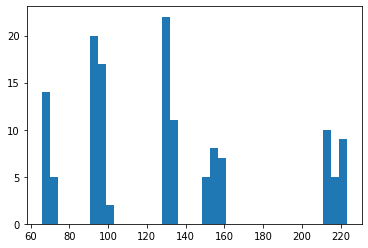

In [ ]:
from matplotlib import pyplot as plt
plt.hist(df_amsterdam["price"], bins = 38)

In [ ]:
import numpy as np

conditions = [
    (df['price'] < 80),
    (df['price'] >= 80) & (df['price'] < 120),
    (df['price'] >= 120) & (df['price'] < 140),
    (df['price'] >= 140) & (df['price'] < 180),
    (df['price'] >= 180)
]

values = [1, 2, 3, 4, 5]

df['cluster_hotel'] = np.select(conditions, values)

df

,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name,cluster_hotel
0,146,158,196,amsterdam,44,french,0,181589,CBBRZL,4
1,9,73,140,amsterdam,44,french,0,181589,CBBRZL,1
2,212,154,193,amsterdam,44,french,0,181589,CBBRZL,4
3,515,223,282,amsterdam,44,french,0,181589,CBBRZL,5
4,921,68,140,amsterdam,44,french,0,181589,CBBRZL,1
...,...,...,...,...,...,...,...,...,...,...
91,551,54,55,vilnius,44,french,0,181597,Y3QUNB,1
92,488,172,279,vilnius,44,french,0,181597,Y3QUNB,4
93,215,73,56,vilnius,44,french,0,181597,Y3QUNB,1
94,187,122,194,vilnius,44,french,0,181597,Y3QUNB,3


In [ ]:
df = df[["hotel_id", "cluster_hotel"]]

In [ ]:
df.to_csv("hotel_price_clust.csv", index = False)